<a href="https://colab.research.google.com/github/p3dr0id/phase-reduction-supply-chain-oscillators/blob/main/perturbacao_osciladores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reprodução dos resultados do artigo da PHYSICAL REVIEW E 73, 036205 (2006)

In [ ]:
from sympy import *

In [ ]:
x, xn_mais_1, xn_menos_1, dx, ddx, omega2, nu, a, D, delta, epsilon = symbols('x_n, x_{n+1}, x_{n-1}, \dot{x}_n, \ddot{x}_n, omega_n^2, nu, a, D, delta_n, epsilon')

Equação (6):

In [ ]:
eq = Eq(ddx + omega2*x - nu*(1-x**2)*dx + a*x**3 - D*(x-1/2*(xn_mais_1 + xn_menos_1)), 0)
eq

Eq(-D*(x_n - 0.5*x_{n+1} - 0.5*x_{n-1}) + \ddot{x}_n - \dot{x}_n*nu*(1 - x_n**2) + a*x_n**3 + omega_n^2*x_n, 0)

Introduzindo parâmetros pequenos escalados por $\epsilon$

In [ ]:
eq1 = eq.subs([(omega2, 1 + epsilon*delta),
               (nu, epsilon*nu),
               (a, epsilon*a),
               (D, epsilon*D)
               ])
eq1

Eq(-D*epsilon*(x_n - 0.5*x_{n+1} - 0.5*x_{n-1}) + \ddot{x}_n - \dot{x}_n*epsilon*nu*(1 - x_n**2) + a*epsilon*x_n**3 + x_n*(delta_n*epsilon + 1), 0)

Soluções perturbativas para $x_n(t)$

In [ ]:
x1, x1n_mais_1, x1n_menos_1, dx1, ddx1, t = symbols("x_n^{(1)}, x_{n+1}^{(1)}, x_{n-1}^{(1)}, \dot{x}_n^{(1)}, \ddot{x}_n^{(1)}, t")

In [ ]:
A, An_mais_1, An_menos_1, Al, A2l, cc = symbols("A_n, A_{n+1}, A_{n-1}, A_n^', A_n^{''}, c.c.")

In [ ]:
#eq2 = eq1.subs([(x, A*exp(I*t)+cc+epsilon*x1),
#               (xn_mais_1, An_mais_1*exp(I*t)+cc+epsilon*x1n_mais_1),
#               (xn_menos_1, An_menos_1*exp(I*t)+cc+epsilon*x1n_menos_1),
#               (dx, (I*A+epsilon*Al)*exp(I*t)+cc+epsilon*dx1),
#               (ddx, (-A+2*I*epsilon*Al+epsilon**2*A2l)*exp(I*t)+cc+epsilon*ddx1)
#               ])
#eq2

In [ ]:
eq2 = eq1.subs([(x, A*exp(I*t)+epsilon*x1),
               (xn_mais_1, An_mais_1*exp(I*t)+epsilon*x1n_mais_1),
               (xn_menos_1, An_menos_1*exp(I*t)+epsilon*x1n_menos_1),
               (dx, (I*A+epsilon*Al)*exp(I*t)+epsilon*dx1),
               (ddx, (-A+2*I*epsilon*Al+epsilon**2*A2l)*exp(I*t)+epsilon*ddx1)
               ])
eq2

Eq(-D*epsilon*(A_n*exp(I*t) - 0.5*A_{n+1}*exp(I*t) - 0.5*A_{n-1}*exp(I*t) + epsilon*x_n^{(1)} - 0.5*epsilon*x_{n+1}^{(1)} - 0.5*epsilon*x_{n-1}^{(1)}) + \ddot{x}_n^{(1)}*epsilon + a*epsilon*(A_n*exp(I*t) + epsilon*x_n^{(1)})**3 - epsilon*nu*(1 - (A_n*exp(I*t) + epsilon*x_n^{(1)})**2)*(\dot{x}_n^{(1)}*epsilon + (I*A_n + A_n^'*epsilon)*exp(I*t)) + (A_n*exp(I*t) + epsilon*x_n^{(1)})*(delta_n*epsilon + 1) + (-A_n + 2*I*A_n^'*epsilon + A_n^{''}*epsilon**2)*exp(I*t), 0)

In [ ]:
eq3 = eq2.expand()
eq3

Eq(A_n**3*a*epsilon*exp(3*I*t) + I*A_n**3*epsilon*nu*exp(3*I*t) + A_n**2*A_n^'*epsilon**2*nu*exp(3*I*t) + A_n**2*\dot{x}_n^{(1)}*epsilon**2*nu*exp(2*I*t) + 3*A_n**2*a*epsilon**2*x_n^{(1)}*exp(2*I*t) + 2*I*A_n**2*epsilon**2*nu*x_n^{(1)}*exp(2*I*t) + 2*A_n*A_n^'*epsilon**3*nu*x_n^{(1)}*exp(2*I*t) - A_n*D*epsilon*exp(I*t) + 2*A_n*\dot{x}_n^{(1)}*epsilon**3*nu*x_n^{(1)}*exp(I*t) + 3*A_n*a*epsilon**3*x_n^{(1)}**2*exp(I*t) + A_n*delta_n*epsilon*exp(I*t) + I*A_n*epsilon**3*nu*x_n^{(1)}**2*exp(I*t) - I*A_n*epsilon*nu*exp(I*t) + A_n^'*epsilon**4*nu*x_n^{(1)}**2*exp(I*t) - A_n^'*epsilon**2*nu*exp(I*t) + 2*I*A_n^'*epsilon*exp(I*t) + A_n^{''}*epsilon**2*exp(I*t) + 0.5*A_{n+1}*D*epsilon*exp(I*t) + 0.5*A_{n-1}*D*epsilon*exp(I*t) - D*epsilon**2*x_n^{(1)} + 0.5*D*epsilon**2*x_{n+1}^{(1)} + 0.5*D*epsilon**2*x_{n-1}^{(1)} + \ddot{x}_n^{(1)}*epsilon + \dot{x}_n^{(1)}*epsilon**4*nu*x_n^{(1)}**2 - \dot{x}_n^{(1)}*epsilon**2*nu + a*epsilon**4*x_n^{(1)}**3 + delta_n*epsilon**2*x_n^{(1)} + epsilon*x_n^{(1)}, 

In [ ]:
expr = eq3.lhs
expr

A_n**3*a*epsilon*exp(3*I*t) + I*A_n**3*epsilon*nu*exp(3*I*t) + A_n**2*A_n^'*epsilon**2*nu*exp(3*I*t) + A_n**2*\dot{x}_n^{(1)}*epsilon**2*nu*exp(2*I*t) + 3*A_n**2*a*epsilon**2*x_n^{(1)}*exp(2*I*t) + 2*I*A_n**2*epsilon**2*nu*x_n^{(1)}*exp(2*I*t) + 2*A_n*A_n^'*epsilon**3*nu*x_n^{(1)}*exp(2*I*t) - A_n*D*epsilon*exp(I*t) + 2*A_n*\dot{x}_n^{(1)}*epsilon**3*nu*x_n^{(1)}*exp(I*t) + 3*A_n*a*epsilon**3*x_n^{(1)}**2*exp(I*t) + A_n*delta_n*epsilon*exp(I*t) + I*A_n*epsilon**3*nu*x_n^{(1)}**2*exp(I*t) - I*A_n*epsilon*nu*exp(I*t) + A_n^'*epsilon**4*nu*x_n^{(1)}**2*exp(I*t) - A_n^'*epsilon**2*nu*exp(I*t) + 2*I*A_n^'*epsilon*exp(I*t) + A_n^{''}*epsilon**2*exp(I*t) + 0.5*A_{n+1}*D*epsilon*exp(I*t) + 0.5*A_{n-1}*D*epsilon*exp(I*t) - D*epsilon**2*x_n^{(1)} + 0.5*D*epsilon**2*x_{n+1}^{(1)} + 0.5*D*epsilon**2*x_{n-1}^{(1)} + \ddot{x}_n^{(1)}*epsilon + \dot{x}_n^{(1)}*epsilon**4*nu*x_n^{(1)}**2 - \dot{x}_n^{(1)}*epsilon**2*nu + a*epsilon**4*x_n^{(1)}**3 + delta_n*epsilon**2*x_n^{(1)} + epsilon*x_n^{(1)}

In [ ]:
collected_expr = collect(expr, epsilon)
collected_expr

epsilon**4*(A_n^'*nu*x_n^{(1)}**2*exp(I*t) + \dot{x}_n^{(1)}*nu*x_n^{(1)}**2 + a*x_n^{(1)}**3) + epsilon**3*(2*A_n*A_n^'*nu*x_n^{(1)}*exp(2*I*t) + 2*A_n*\dot{x}_n^{(1)}*nu*x_n^{(1)}*exp(I*t) + 3*A_n*a*x_n^{(1)}**2*exp(I*t) + I*A_n*nu*x_n^{(1)}**2*exp(I*t)) + epsilon**2*(A_n**2*A_n^'*nu*exp(3*I*t) + A_n**2*\dot{x}_n^{(1)}*nu*exp(2*I*t) + 3*A_n**2*a*x_n^{(1)}*exp(2*I*t) + 2*I*A_n**2*nu*x_n^{(1)}*exp(2*I*t) - A_n^'*nu*exp(I*t) + A_n^{''}*exp(I*t) - D*x_n^{(1)} + 0.5*D*x_{n+1}^{(1)} + 0.5*D*x_{n-1}^{(1)} - \dot{x}_n^{(1)}*nu + delta_n*x_n^{(1)}) + epsilon*(A_n**3*a*exp(3*I*t) + I*A_n**3*nu*exp(3*I*t) - A_n*D*exp(I*t) + A_n*delta_n*exp(I*t) - I*A_n*nu*exp(I*t) + 2*I*A_n^'*exp(I*t) + 0.5*A_{n+1}*D*exp(I*t) + 0.5*A_{n-1}*D*exp(I*t) + \ddot{x}_n^{(1)} + x_n^{(1)})

In [ ]:
eq4 = collected_expr.coeff(epsilon,1)
eq4

A_n**3*a*exp(3*I*t) + I*A_n**3*nu*exp(3*I*t) - A_n*D*exp(I*t) + A_n*delta_n*exp(I*t) - I*A_n*nu*exp(I*t) + 2*I*A_n^'*exp(I*t) + 0.5*A_{n+1}*D*exp(I*t) + 0.5*A_{n-1}*D*exp(I*t) + \ddot{x}_n^{(1)} + x_n^{(1)}

Equação (12) do artigo do Cross (2006):

In [ ]:
eq5 = eq4.subs(A**3*exp(3*I*t), Abs(A)**2*A*exp(I*t))
eq5

-A_n*D*exp(I*t) + A_n*a*exp(I*t)*Abs(A_n)**2 + A_n*delta_n*exp(I*t) + I*A_n*nu*exp(I*t)*Abs(A_n)**2 - I*A_n*nu*exp(I*t) + 2*I*A_n^'*exp(I*t) + 0.5*A_{n+1}*D*exp(I*t) + 0.5*A_{n-1}*D*exp(I*t) + \ddot{x}_n^{(1)} + x_n^{(1)}

In [ ]:
eq5.coeff(exp(I*t),1)

-A_n*D + A_n*a*Abs(A_n)**2 + A_n*delta_n + I*A_n*nu*Abs(A_n)**2 - I*A_n*nu + 2*I*A_n^' + 0.5*A_{n+1}*D + 0.5*A_{n-1}*D

# Aplicação do método perturbativo na equação da cadeia de suprimentos não linear

In [ ]:
q, qn_mais_1, dq, dqn_mais_1, ddq, nu, mu, alpha, beta = symbols("q_n, q_{n+1}, \dot{q}_n, \dot{q}_{n+1}, \ddot{q}_n, nu, mu, alpha, beta", real=True)

In [ ]:
eq = Eq(ddq - (nu-beta-3*mu*q**2)*dq + alpha*q - alpha*qn_mais_1 - beta*dqn_mais_1, 0)
eq

Eq(\ddot{q}_n - \dot{q}_n*(-beta - 3*mu*q_n**2 + nu) - \dot{q}_{n+1}*beta + alpha*q_n - alpha*q_{n+1}, 0)

Introduzindo parâmetros pequenos escalados por $\epsilon$

In [ ]:
eq1 = eq.subs([(beta, epsilon*beta),
               (nu, epsilon*nu),
               (alpha, epsilon*alpha),
               (mu, epsilon*mu)
               ])
eq1

Eq(\ddot{q}_n - \dot{q}_n*(-beta*epsilon - 3*epsilon*mu*q_n**2 + epsilon*nu) - \dot{q}_{n+1}*beta*epsilon + alpha*epsilon*q_n - alpha*epsilon*q_{n+1}, 0)

Soluções perturbativas para $q_i(t)$

In [ ]:
q1, q1n_mais_1, dq1n_mais_1, dq1, ddq1, t = symbols("q_n^{(1)}, q_{n+1}^{(1)}, \dot{q}_{n+1}^{(1)}, \dot{q}_n^{(1)}, \ddot{q}_n^{(1)}, t")

In [ ]:
A, An_mais_1, Al, Aln_mais_1, A2l, cc = symbols("A_n, A_{n+1}, A_n^{'}, A_{n+1}^{'}, A_n^{''}, c.c.", complex=True)

In [ ]:
eq2 = eq1.subs([(q, A*exp(I*t)+epsilon*q1),
               (qn_mais_1, An_mais_1*exp(I*t)+epsilon*q1n_mais_1),
               (dq, (I*A+epsilon*Al)*exp(I*t)+epsilon*dq1),
               (dqn_mais_1, (I*An_mais_1+epsilon*Aln_mais_1)*exp(I*t)+epsilon*dq1n_mais_1),
               (ddq, (-A+2*I*epsilon*Al+epsilon**2*A2l)*exp(I*t)+epsilon*ddq1)
               ])
eq2

Eq(\ddot{q}_n^{(1)}*epsilon + alpha*epsilon*(A_n*exp(I*t) + epsilon*q_n^{(1)}) - alpha*epsilon*(A_{n+1}*exp(I*t) + epsilon*q_{n+1}^{(1)}) - beta*epsilon*(\dot{q}_{n+1}^{(1)}*epsilon + (I*A_{n+1} + A_{n+1}^{'}*epsilon)*exp(I*t)) - (\dot{q}_n^{(1)}*epsilon + (I*A_n + A_n^{'}*epsilon)*exp(I*t))*(-beta*epsilon - 3*epsilon*mu*(A_n*exp(I*t) + epsilon*q_n^{(1)})**2 + epsilon*nu) + (-A_n + A_n^{''}*epsilon**2 + 2*I*A_n^{'}*epsilon)*exp(I*t), 0)

In [ ]:
eq3 = eq2.expand()
eq3

Eq(3*I*A_n**3*epsilon*mu*exp(3*I*t) + 3*A_n**2*A_n^{'}*epsilon**2*mu*exp(3*I*t) + 3*A_n**2*\dot{q}_n^{(1)}*epsilon**2*mu*exp(2*I*t) + 6*I*A_n**2*epsilon**2*mu*q_n^{(1)}*exp(2*I*t) + 6*A_n*A_n^{'}*epsilon**3*mu*q_n^{(1)}*exp(2*I*t) + 6*A_n*\dot{q}_n^{(1)}*epsilon**3*mu*q_n^{(1)}*exp(I*t) + A_n*alpha*epsilon*exp(I*t) + I*A_n*beta*epsilon*exp(I*t) + 3*I*A_n*epsilon**3*mu*q_n^{(1)}**2*exp(I*t) - I*A_n*epsilon*nu*exp(I*t) - A_n*exp(I*t) + A_n^{''}*epsilon**2*exp(I*t) + A_n^{'}*beta*epsilon**2*exp(I*t) + 3*A_n^{'}*epsilon**4*mu*q_n^{(1)}**2*exp(I*t) - A_n^{'}*epsilon**2*nu*exp(I*t) + 2*I*A_n^{'}*epsilon*exp(I*t) - A_{n+1}*alpha*epsilon*exp(I*t) - I*A_{n+1}*beta*epsilon*exp(I*t) - A_{n+1}^{'}*beta*epsilon**2*exp(I*t) + \ddot{q}_n^{(1)}*epsilon + \dot{q}_n^{(1)}*beta*epsilon**2 + 3*\dot{q}_n^{(1)}*epsilon**4*mu*q_n^{(1)}**2 - \dot{q}_n^{(1)}*epsilon**2*nu - \dot{q}_{n+1}^{(1)}*beta*epsilon**2 + alpha*epsilon**2*q_n^{(1)} - alpha*epsilon**2*q_{n+1}^{(1)}, 0)

In [ ]:
expr = eq3.lhs
expr

3*I*A_n**3*epsilon*mu*exp(3*I*t) + 3*A_n**2*A_n^{'}*epsilon**2*mu*exp(3*I*t) + 3*A_n**2*\dot{q}_n^{(1)}*epsilon**2*mu*exp(2*I*t) + 6*I*A_n**2*epsilon**2*mu*q_n^{(1)}*exp(2*I*t) + 6*A_n*A_n^{'}*epsilon**3*mu*q_n^{(1)}*exp(2*I*t) + 6*A_n*\dot{q}_n^{(1)}*epsilon**3*mu*q_n^{(1)}*exp(I*t) + A_n*alpha*epsilon*exp(I*t) + I*A_n*beta*epsilon*exp(I*t) + 3*I*A_n*epsilon**3*mu*q_n^{(1)}**2*exp(I*t) - I*A_n*epsilon*nu*exp(I*t) - A_n*exp(I*t) + A_n^{''}*epsilon**2*exp(I*t) + A_n^{'}*beta*epsilon**2*exp(I*t) + 3*A_n^{'}*epsilon**4*mu*q_n^{(1)}**2*exp(I*t) - A_n^{'}*epsilon**2*nu*exp(I*t) + 2*I*A_n^{'}*epsilon*exp(I*t) - A_{n+1}*alpha*epsilon*exp(I*t) - I*A_{n+1}*beta*epsilon*exp(I*t) - A_{n+1}^{'}*beta*epsilon**2*exp(I*t) + \ddot{q}_n^{(1)}*epsilon + \dot{q}_n^{(1)}*beta*epsilon**2 + 3*\dot{q}_n^{(1)}*epsilon**4*mu*q_n^{(1)}**2 - \dot{q}_n^{(1)}*epsilon**2*nu - \dot{q}_{n+1}^{(1)}*beta*epsilon**2 + alpha*epsilon**2*q_n^{(1)} - alpha*epsilon**2*q_{n+1}^{(1)}

In [ ]:
collected_expr = collect(expr, epsilon)
collected_expr

-A_n*exp(I*t) + epsilon**4*(3*A_n^{'}*mu*q_n^{(1)}**2*exp(I*t) + 3*\dot{q}_n^{(1)}*mu*q_n^{(1)}**2) + epsilon**3*(6*A_n*A_n^{'}*mu*q_n^{(1)}*exp(2*I*t) + 6*A_n*\dot{q}_n^{(1)}*mu*q_n^{(1)}*exp(I*t) + 3*I*A_n*mu*q_n^{(1)}**2*exp(I*t)) + epsilon**2*(3*A_n**2*A_n^{'}*mu*exp(3*I*t) + 3*A_n**2*\dot{q}_n^{(1)}*mu*exp(2*I*t) + 6*I*A_n**2*mu*q_n^{(1)}*exp(2*I*t) + A_n^{''}*exp(I*t) + A_n^{'}*beta*exp(I*t) - A_n^{'}*nu*exp(I*t) - A_{n+1}^{'}*beta*exp(I*t) + \dot{q}_n^{(1)}*beta - \dot{q}_n^{(1)}*nu - \dot{q}_{n+1}^{(1)}*beta + alpha*q_n^{(1)} - alpha*q_{n+1}^{(1)}) + epsilon*(3*I*A_n**3*mu*exp(3*I*t) + A_n*alpha*exp(I*t) + I*A_n*beta*exp(I*t) - I*A_n*nu*exp(I*t) + 2*I*A_n^{'}*exp(I*t) - A_{n+1}*alpha*exp(I*t) - I*A_{n+1}*beta*exp(I*t) + \ddot{q}_n^{(1)})

In [ ]:
eq4 = collected_expr.coeff(epsilon,1)
eq4

3*I*A_n**3*mu*exp(3*I*t) + A_n*alpha*exp(I*t) + I*A_n*beta*exp(I*t) - I*A_n*nu*exp(I*t) + 2*I*A_n^{'}*exp(I*t) - A_{n+1}*alpha*exp(I*t) - I*A_{n+1}*beta*exp(I*t) + \ddot{q}_n^{(1)}

Infelizmente a equação acima não tem o termo $\dot{q}_n^{(1)}$ e não podemos fazer a mesma consideração dos termos proporcionais às exponenciais imaginárias atuarem como uma força externa que deve ser nula para não divergir a solução perturbativa.

# Alternativa: Método Krylov-Bogoliubov (KB) para escrever equações de fase

In [ ]:
eq

Eq(\ddot{q}_n - \dot{q}_n*(-beta - 3*mu*q_n**2 + nu) - \dot{q}_{n+1}*beta + alpha*q_n - alpha*q_{n+1}, 0)

In [ ]:
alphas, phi, dphi, phin_mais_1, an, anast, an_mais_1, an_mais_1ast, dan = symbols('alpha_s, phi_n, \dot{\phi}_n, \phi_{n+1}, a_n, a_n^*, a_{n+1}, a_{n+1}^*, \dot{a}_n', real=True)

In [ ]:
eq1 = eq.subs([(ddq, I*alphas*dan*exp(I*alphas*t)-alphas**2/2*(an*exp(I*alphas*t)+anast*exp(-I*alphas*t)) ),
               (dq, I*alphas/2*(an*exp(I*alphas*t)-anast*exp(-I*alphas*t)) ),
               (dqn_mais_1, I*alphas/2*(an_mais_1*exp(I*alphas*t)-an_mais_1ast*exp(-I*alphas*t)) ),
               (q, 1/2*(an*exp(I*alphas*t)+anast*exp(-I*alphas*t)) ),
               (qn_mais_1, 1/2*(an_mais_1*exp(I*alphas*t)+an_mais_1ast*exp(-I*alphas*t)) )
               ])
eq1

Eq(I*\dot{a}_n*alpha_s*exp(I*alpha_s*t) + alpha*(0.5*a_n*exp(I*alpha_s*t) + 0.5*a_n^**exp(-I*alpha_s*t)) - alpha*(0.5*a_{n+1}*exp(I*alpha_s*t) + 0.5*a_{n+1}^**exp(-I*alpha_s*t)) - alpha_s**2*(a_n*exp(I*alpha_s*t) + a_n^**exp(-I*alpha_s*t))/2 - I*alpha_s*beta*(a_{n+1}*exp(I*alpha_s*t) - a_{n+1}^**exp(-I*alpha_s*t))/2 - I*alpha_s*(a_n*exp(I*alpha_s*t) - a_n^**exp(-I*alpha_s*t))*(-beta - 0.75*mu*(a_n*exp(I*alpha_s*t) + a_n^**exp(-I*alpha_s*t))**2 + nu)/2, 0)

In [ ]:
eq2 = eq1.lhs*(exp(-I*alphas*t))/(I*alphas)
eq2

-I*(I*\dot{a}_n*alpha_s*exp(I*alpha_s*t) + alpha*(0.5*a_n*exp(I*alpha_s*t) + 0.5*a_n^**exp(-I*alpha_s*t)) - alpha*(0.5*a_{n+1}*exp(I*alpha_s*t) + 0.5*a_{n+1}^**exp(-I*alpha_s*t)) - alpha_s**2*(a_n*exp(I*alpha_s*t) + a_n^**exp(-I*alpha_s*t))/2 - I*alpha_s*beta*(a_{n+1}*exp(I*alpha_s*t) - a_{n+1}^**exp(-I*alpha_s*t))/2 - I*alpha_s*(a_n*exp(I*alpha_s*t) - a_n^**exp(-I*alpha_s*t))*(-beta - 0.75*mu*(a_n*exp(I*alpha_s*t) + a_n^**exp(-I*alpha_s*t))**2 + nu)/2)*exp(-I*alpha_s*t)/alpha_s

In [ ]:
eq3 = eq2.expand()
eq3

\dot{a}_n + 0.375*a_n**3*mu*exp(2*I*alpha_s*t) + 0.375*a_n**2*a_n^**mu - 0.375*a_n*a_n^***2*mu*exp(-2*I*alpha_s*t) - 0.5*I*a_n*alpha/alpha_s + I*a_n*alpha_s/2 + a_n*beta/2 - a_n*nu/2 - 0.375*a_n^***3*mu*exp(-4*I*alpha_s*t) - 0.5*I*a_n^**alpha*exp(-2*I*alpha_s*t)/alpha_s + I*a_n^**alpha_s*exp(-2*I*alpha_s*t)/2 - a_n^**beta*exp(-2*I*alpha_s*t)/2 + a_n^**nu*exp(-2*I*alpha_s*t)/2 + 0.5*I*a_{n+1}*alpha/alpha_s - a_{n+1}*beta/2 + 0.5*I*a_{n+1}^**alpha*exp(-2*I*alpha_s*t)/alpha_s + a_{n+1}^**beta*exp(-2*I*alpha_s*t)/2

In [ ]:
eq3.coeff(exp(I*alphas*t),-2)

-0.375*a_n*a_n^***2*mu - 0.5*I*a_n^**alpha/alpha_s + I*a_n^**alpha_s/2 - a_n^**beta/2 + a_n^**nu/2 + 0.5*I*a_{n+1}^**alpha/alpha_s + a_{n+1}^**beta/2

In [ ]:
eq3.coeff(exp(I*alphas*t),2)

0.375*a_n**3*mu

In [ ]:
eq3.coeff(exp(I*alphas*t),-4)

-0.375*a_n^***3*mu

In [ ]:
eq4 = (eq3 - eq3.coeff(exp(I*alphas*t),-2)*exp(-2*I*alphas*t) - eq3.coeff(exp(I*alphas*t),2)*exp(2*I*alphas*t) - eq3.coeff(exp(I*alphas*t),-4)*exp(-4*I*alphas*t)).expand()
eq4

\dot{a}_n + 0.375*a_n**2*a_n^**mu - 0.5*I*a_n*alpha/alpha_s + I*a_n*alpha_s/2 + a_n*beta/2 - a_n*nu/2 + 0.5*I*a_{n+1}*alpha/alpha_s - a_{n+1}*beta/2

In [ ]:
A, An_mais_1, Al = symbols("A_n, A_{n+1}, \dot{A}_n", real=True)

In [ ]:
eq5 = eq4.subs([(anast*an**2, A**3*exp(I*phi) ),
                (dan, Al*exp(I*phi)+ I*dphi*A*exp(I*phi) ),
                (an, A*exp(I*phi) ),
                (an_mais_1, An_mais_1*exp(I*phin_mais_1) )
                ])
eq5

0.375*A_n**3*mu*exp(I*phi_n) + I*A_n*\dot{\phi}_n*exp(I*phi_n) - 0.5*I*A_n*alpha*exp(I*phi_n)/alpha_s + I*A_n*alpha_s*exp(I*phi_n)/2 + A_n*beta*exp(I*phi_n)/2 - A_n*nu*exp(I*phi_n)/2 + 0.5*I*A_{n+1}*alpha*exp(I*\phi_{n+1})/alpha_s - A_{n+1}*beta*exp(I*\phi_{n+1})/2 + \dot{A}_n*exp(I*phi_n)

In [ ]:
eq6 = (eq5*exp(-I*phi)).expand().simplify()
eq6

0.375*A_n**3*mu + I*A_n*\dot{\phi}_n - 0.5*I*A_n*alpha/alpha_s + I*A_n*alpha_s/2 + A_n*beta/2 - A_n*nu/2 + I*A_{n+1}*alpha*exp(I*\phi_{n+1} - I*phi_n)/(2*alpha_s) - A_{n+1}*beta*exp(I*\phi_{n+1} - I*phi_n)/2 + \dot{A}_n

In [ ]:
eq7 = eq6.rewrite(cos).trigsimp()
eq7

0.375*A_n**3*mu + I*A_n*\dot{\phi}_n - 0.5*I*A_n*alpha/alpha_s + I*A_n*alpha_s/2 + A_n*beta/2 - A_n*nu/2 + I*A_{n+1}*alpha*(I*sin(\phi_{n+1} - phi_n) + cos(\phi_{n+1} - phi_n))/(2*alpha_s) - A_{n+1}*beta*(I*sin(\phi_{n+1} - phi_n) + cos(\phi_{n+1} - phi_n))/2 + \dot{A}_n

In [ ]:
im(eq7)

A_n*\dot{\phi}_n - 0.5*A_n*alpha/alpha_s + A_n*alpha_s/2 + A_{n+1}*alpha*cos(\phi_{n+1} - phi_n)/(2*alpha_s) - A_{n+1}*beta*sin(\phi_{n+1} - phi_n)/2

Equação da dinâmica da fase:

In [ ]:
eq8 = (im(eq7)/A).expand()
eq8

\dot{\phi}_n - 0.5*alpha/alpha_s + alpha_s/2 + A_{n+1}*alpha*cos(\phi_{n+1} - phi_n)/(2*A_n*alpha_s) - A_{n+1}*beta*sin(\phi_{n+1} - phi_n)/(2*A_n)

Equação da dinâmica da amplitude:

In [ ]:
eq9 = re(eq7)
eq9

0.375*A_n**3*mu + A_n*beta/2 - A_n*nu/2 - A_{n+1}*alpha*sin(\phi_{n+1} - phi_n)/(2*alpha_s) - A_{n+1}*beta*cos(\phi_{n+1} - phi_n)/2 + \dot{A}_n

# Estudo numérico da equação de fase

In [ ]:
# pacote para integração de equações diferenciais estocásticas
!pip install sdeint

     |████████████████████████████████| 41 kB 516 kB/s 
  Created wheel for sdeint: filename=sdeint-0.2.2-py3-none-any.whl size=27832 sha256=2288e6e44ea3299d832568bfa4330024b46b5271a16ab3cb2c773aa21560cefc
  Stored in directory: /root/.cache/pip/wheels/f3/1d/ed/ec3ca11c90feaa579fe504b5da5c6ae00a499303764788d653
Successfully built sdeint


In [ ]:
# importação de bibliotecas necessárias
import numpy as np
import sdeint
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# definição de parâmetros
N = 5 # número de osciladores
alpha = 5
alphas = 2
beta = 6
nu = 7
mu = 1
tf = 20 # tempo final de simulação
delta_t=0.01 # intervalo entre pontos de tempo de simulação
nt=int(tf/delta_t) # nº de pontos de tempo de simulação
t = np.linspace(0, tf, nt) # vetor de tempo de simulação

In [ ]:
# condições iniciais
phi0 = np.random.uniform(0,2*np.pi,N) # condição inicial para as fases dos osciladores
A0 = np.random.uniform(0,1,N) # condição inicial para as amplitudes

R=np.concatenate((np.zeros(N-1),np.array([1.0]),np.zeros(N-1),np.array([1.0]))).reshape(2*N,1)
R

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [ ]:
eq8

\dot{\phi}_n - 0.5*alpha/alpha_s + alpha_s/2 + A_{n+1}*alpha*cos(\phi_{n+1} - phi_n)/(2*A_n*alpha_s) - A_{n+1}*beta*sin(\phi_{n+1} - phi_n)/(2*A_n)

In [ ]:
eq9

0.375*A_n**3*mu + A_n*beta/2 - A_n*nu/2 - A_{n+1}*alpha*sin(\phi_{n+1} - phi_n)/(2*alpha_s) - A_{n+1}*beta*cos(\phi_{n+1} - phi_n)/2 + \dot{A}_n

In [ ]:
# funções que definem o sistema de equações diferenciais
def f(x,t):
  phi = x[:N]
  A = x[N:]
  dphidt = np.zeros(N,float)
  dAdt = np.zeros(N,float)
  for n in range(0,N-1):
    dphidt[n] = 0.5*alpha/alphas - alphas/2 - A[n+1]*alpha*cos(phi[n+1]-phi[n])/(2*A[n]*alphas) + A[n+1]*beta*sin(phi[n+1]-phi[n])/(2*A[n])
    dAdt[n] = A[n]/2*(nu-beta) - 0.375*A[n]**3*mu + A[n+1]*alpha*sin(phi[n+1]-phi[n])/(2*alphas) + A[n+1]*beta*cos(phi[n+1]-phi[n])/2
  dphidt[N-1] = 0.5*alpha/alphas - alphas/2
  dAdt[N-1] = A[N-1]/2*(nu-beta) - 0.375*A[N-1]**3*mu
  return np.concatenate((dphidt, dAdt))

def g(x,t):
  Amp_ruido = 0.5
  ruido = R*Amp_ruido
  return ruido

In [ ]:
# integração do sistema de equações
yinit = np.concatenate((phi0,A0))
res = sdeint.itoint(f,g,yinit,t)
res.shape

(2000, 10)

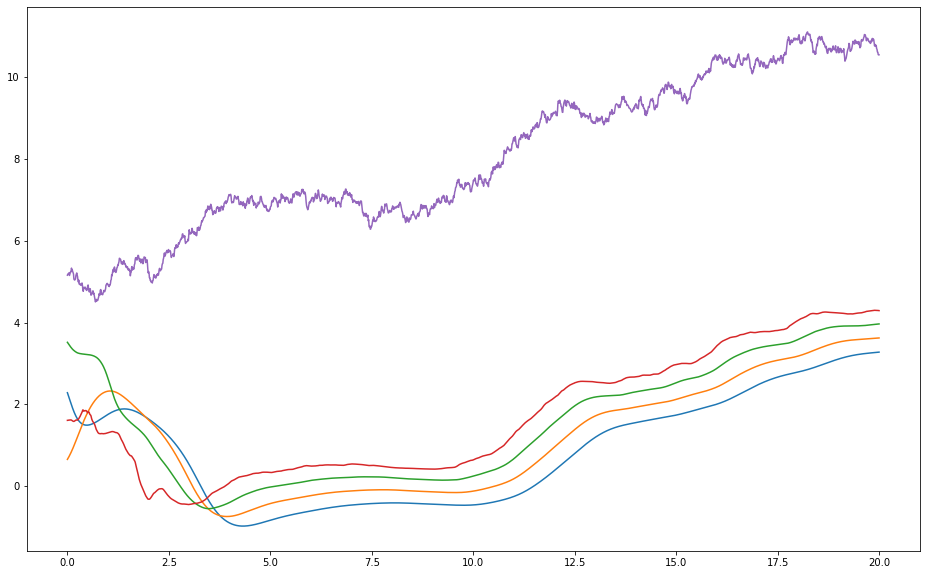

In [ ]:
# plot das fases no tempo
plt.figure(figsize=(16,10))
plt.plot(t, res[:,:N]);

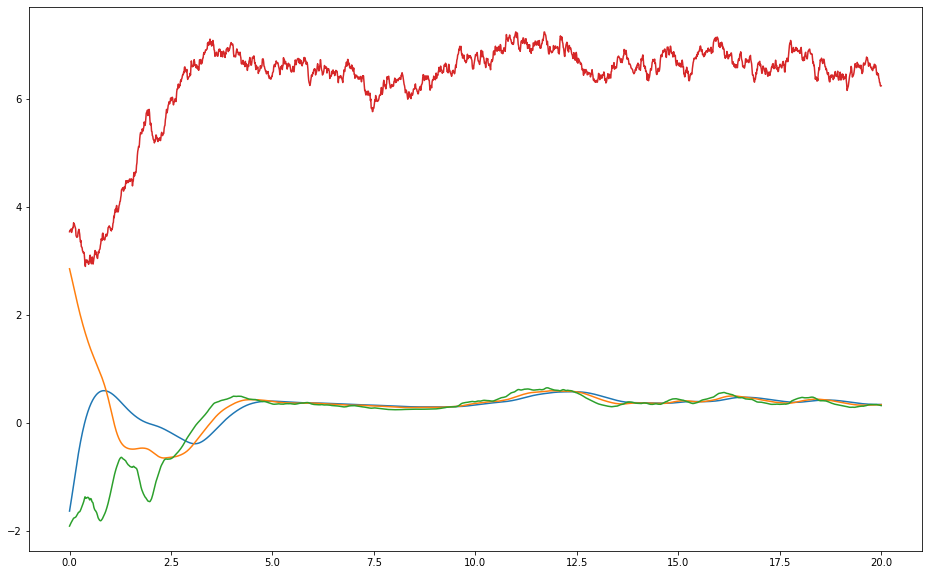

In [ ]:
# plot das diferenças de fases no tempo
plt.figure(figsize=(16,10))
plt.plot(t, (res[:,1:N]-res[:,:N-1]));

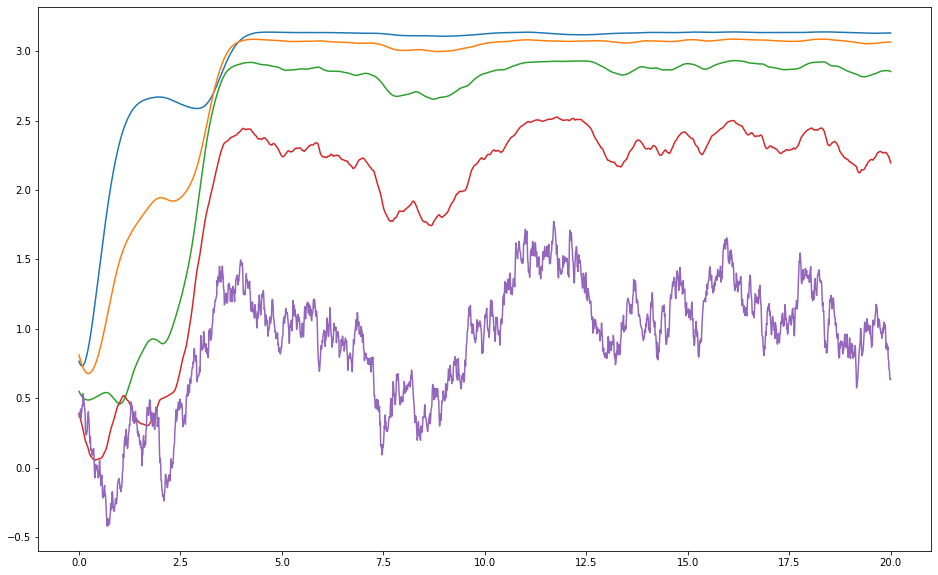

In [ ]:
# plot das amplitudes no tempo
plt.figure(figsize=(16,10))
plt.plot(t, res[:,N:]);

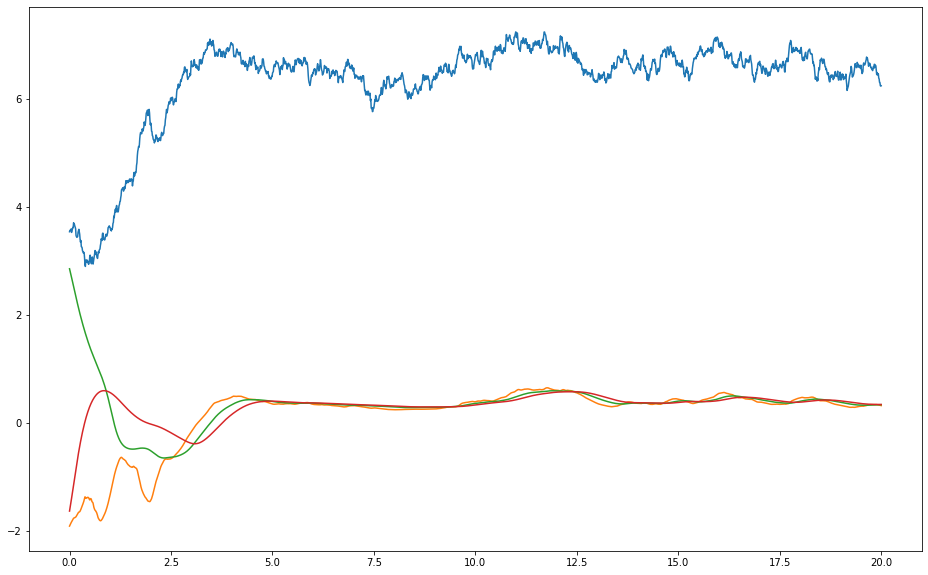

In [ ]:
# plot das diferenças de fases no tempo
plt.figure(figsize=(16,10))
plt.plot(t, (res[:,4:5]-res[:,3:4]) );
plt.plot(t, (res[:,3:4]-res[:,2:3]) );
plt.plot(t, (res[:,2:3]-res[:,1:2]) );
plt.plot(t, (res[:,1:2]-res[:,:1]) );
